In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [2]:

# dir='C:\\Users\\91976\\Downloads\\DB\\dataset\\resized'
# datadir='D:\\proj\\svm\\DB\\dataset\\resized'
datadir='D:\\3rdYearMiniProject\\Implementation\\SVM\\dataset\\dataset\\resized'


In [3]:
Categories=['alfalfa',
'allium',
'borage',
'burdock',
'calendula',
'cattail',
'chickweed',
'chicory',
'chive_blossom',
'coltsfoot',
'common_mallow',
'common_milkweed',
'common_vetch',
'common_yarrow',
'coneflower',
'cow_parsley',
'cowslip',
'crimson_clover',
'crithmum_maritimum',
'daisy',
'dandelion',
'fennel',
'fireweed',
'gardenia',
'garlic_mustard',
'geranium',
'ground_ivy',
'harebell',
'henbit',
'knapweed',
'meadowsweet',
'mullein',
'pickerelweed',
'ramsons',
'red_clover'
]

In [4]:
data = []

In [5]:
flat_data_arr=[]
target_arr=[]
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : alfalfa
loaded category:alfalfa successfully
loading... category : allium
loaded category:allium successfully
loading... category : borage
loaded category:borage successfully
loading... category : burdock
loaded category:burdock successfully
loading... category : calendula
loaded category:calendula successfully
loading... category : cattail
loaded category:cattail successfully
loading... category : chickweed
loaded category:chickweed successfully
loading... category : chicory
loaded category:chicory successfully
loading... category : chive_blossom
loaded category:chive_blossom successfully
loading... category : coltsfoot
loaded category:coltsfoot successfully
loading... category : common_mallow
loaded category:common_mallow successfully
loading... category : common_milkweed
loaded category:common_milkweed successfully
loading... category : common_vetch
loaded category:common_vetch successfully
loading... category : common_yarrow
loaded category:common_yarrow succe

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.549020,0.784314,0.992157,0.552941,0.784314,0.992157,0.558824,0.784314,0.992157,0.560784,...,0.380392,0.470588,0.329412,0.301961,0.354902,0.270588,0.098039,0.190196,0.115686,0
1,0.478882,0.531026,0.492608,0.504157,0.574745,0.521222,0.459856,0.512797,0.452810,0.403425,...,0.363261,0.419908,0.336392,0.359922,0.421288,0.332471,0.341693,0.386791,0.315621,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001961,0.005882,0.003922,0.020131,0.028235,0.010065,0
3,0.049451,0.029843,0.018078,0.040314,0.027451,0.011765,0.028980,0.027451,0.011333,0.021569,...,0.000000,0.000000,0.000000,0.003059,0.003059,0.003059,0.003490,0.003490,0.003490,0
4,0.215765,0.360876,0.109869,0.250954,0.397993,0.123562,0.221425,0.354745,0.117588,0.139203,...,0.149078,0.215758,0.123595,0.152941,0.227451,0.141176,0.154869,0.229379,0.143105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0.032026,0.067320,0.050980,0.031373,0.060784,0.050980,0.027451,0.050980,0.050980,0.021895,...,0.102288,0.231699,0.121569,0.105882,0.235294,0.125490,0.101961,0.231373,0.125490,34
550,0.580392,0.458824,0.552941,0.584654,0.458824,0.561124,0.588575,0.459163,0.565046,0.594118,...,0.439216,0.617647,0.237255,0.443137,0.623529,0.239216,0.435634,0.616026,0.231712,34
551,0.189869,0.305229,0.115359,0.150980,0.262745,0.098693,0.138562,0.240850,0.074183,0.182353,...,0.530065,0.510784,0.461765,0.544118,0.528105,0.495425,0.530719,0.516667,0.516667,34
552,0.162706,0.252895,0.060771,0.197980,0.299922,0.099954,0.194072,0.305817,0.097993,0.149046,...,0.178451,0.276497,0.098039,0.129464,0.202013,0.086307,0.107876,0.160830,0.041242,34


In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [7]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_\


The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [6]:
svc=svm.SVC(probability=True)

In [8]:
y_pred=model.predict(x_test)

print("The predicted Data is :")
y_pred 

The predicted Data is :


array([15, 13, 25,  8, 29, 22, 20,  3, 12, 22, 22,  8, 24, 20, 20, 17, 18,
       16, 30, 28, 17, 17, 15,  8,  3,  2, 14,  3,  7,  1, 15, 26, 18, 10,
       24, 34, 20, 25, 12, 24,  3, 12,  7, 17, 34,  5, 31, 30, 13,  3,  9,
       34, 17, 13,  7, 12,  8,  4, 28, 15,  3,  3, 34, 18,  4, 20, 27, 16,
       10,  5, 22, 27,  9, 20,  3, 13, 23, 20,  5,  8,  5, 19, 26,  8, 12,
       31, 25,  6,  4, 29,  0, 27, 23, 10,  3, 18, 34, 14, 34,  2, 24, 28,
       34, 23, 10, 11, 23,  2,  1, 19, 18])

In [9]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([11, 30, 23, 27, 12, 17, 23, 29, 12,  5, 30,  9, 24, 20, 10, 21, 18,
       16, 19, 25, 21, 18, 24, 34, 32, 28, 14,  1, 10,  4,  1, 26, 31,  7,
       26,  5, 31, 25,  1,  6,  3,  0, 12, 16, 16,  6, 21, 34,  2,  3, 13,
       11, 17, 19,  7, 12, 23, 31, 19, 33, 11, 28, 24, 18, 21, 22, 27,  9,
       22, 30,  5, 27,  9, 20,  0, 32,  4,  8, 22, 26,  3,  0,  2,  8, 15,
       20,  7, 33,  4, 28, 29,  7, 13,  8, 33,  6, 29, 14, 32, 15, 15,  0,
       14, 13, 10, 34, 25,  2, 25, 19, 17])

In [11]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 92.156% accurate


In [12]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


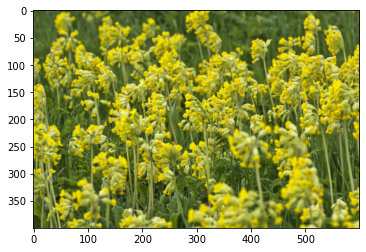

alfalfa = 2.3668237092082816%
allium = 1.8606094969666354%
borage = 1.3711168685275614%
burdock = 2.822505565193022%
calendula = 3.6254290196228065%
cattail = 3.6420663221058454%
chickweed = 1.952466330240661%
chicory = 0.23485087259654466%
chive_blossom = 0.8435976416355024%
coltsfoot = 4.171202341541784%
common_mallow = 3.1843499273509837%
common_milkweed = 3.1314331464371223%
common_vetch = 3.030542046917524%
common_yarrow = 1.7034480197286452%
coneflower = 1.3598674436033142%
cow_parsley = 0.8076381442498165%
cowslip = 13.595722324051948%
crimson_clover = 5.002921307625815%
crithmum_maritimum = 5.731390603092979%
daisy = 0.43791399362722305%
dandelion = 2.4970830952854537%
fennel = 4.963953060718768%
fireweed = 2.0412501716627687%
gardenia = 0.4502543301349907%
garlic_mustard = 2.6762287737337718%
geranium = 0.48391048404256626%
ground_ivy = 2.894804031069934%
harebell = 1.1458087186284482%
henbit = 3.046388250550713%
knapweed = 1.095077067996089%
meadowsweet = 1.7986992059021631%


In [23]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")
